Where do people drink most? In this data we have list of countries with columns of consuption of alcohol (wine, beer, sprits).It is interesting to see do we have cultural differences in drinking patterns?


In [2]:
import pandas as pd
import numpy as np
from pandas import Series,DataFrame
from numpy.random import randn
#import stats library from numpy
from scipy import stats
#these are the ploting moduls and libraries we will use
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
#command so that plots appear in iPython Notebook
%matplotlib inline
sns.set_style('whitegrid')

In [3]:
drinks=pd.read_csv('drinks.csv')

In [4]:
drinks

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,Afghanistan,0,0,0,0.0
1,Albania,89,132,54,4.9
2,Algeria,25,0,14,0.7
3,Andorra,245,138,312,12.4
4,Angola,217,57,45,5.9
...,...,...,...,...,...
188,Venezuela,333,100,3,7.7
189,Vietnam,111,2,1,2.0
190,Yemen,6,0,0,0.1
191,Zambia,32,19,4,2.5


In [5]:
drinks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 193 non-null    int64  
 2   spirit_servings               193 non-null    int64  
 3   wine_servings                 193 non-null    int64  
 4   total_litres_of_pure_alcohol  193 non-null    float64
dtypes: float64(1), int64(3), object(1)
memory usage: 7.7+ KB


In [6]:
drinks.index=drinks['country']

In [7]:
drinks=drinks.drop(['country'],axis=1)

We will sort table by total liters of alcohol served to see in which countries alcohol is most served.

In [8]:
drinks_sorted=drinks.sort_values(by='total_litres_of_pure_alcohol',ascending=False)

In [9]:
drinks_sorted.head(20)

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
country,,,,
Belarus,142,373,42,14.4
Lithuania,343,244,56,12.9
Andorra,245,138,312,12.4
Grenada,199,438,28,11.9
Czech Republic,361,170,134,11.8
France,127,151,370,11.8
Russian Federation,247,326,73,11.5
Ireland,313,118,165,11.4
Slovakia,196,293,116,11.4


<Axes: ylabel='country'>

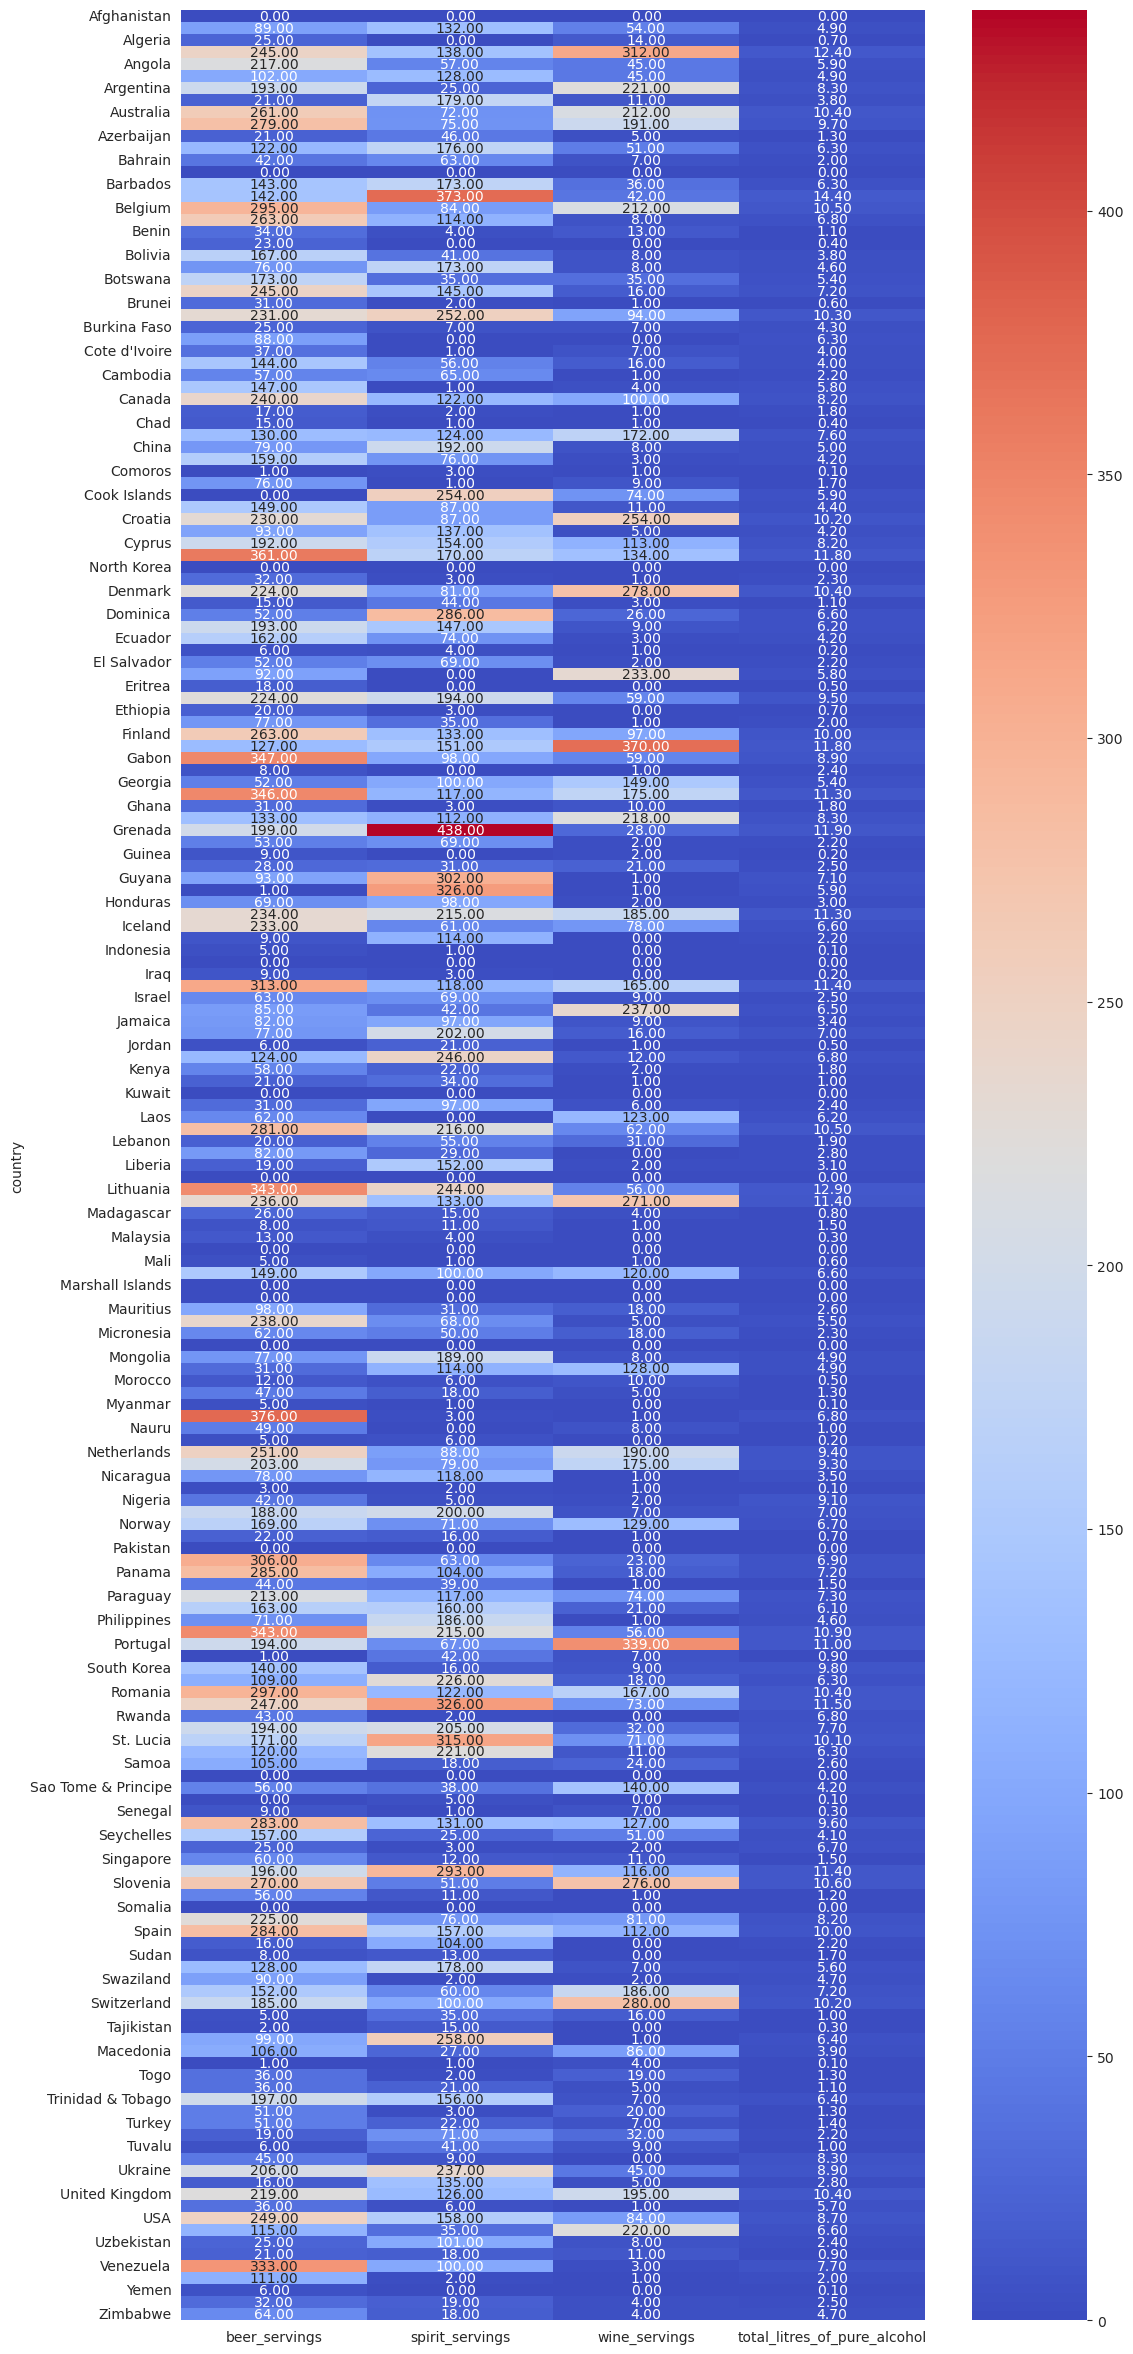

In [10]:
plt.figure(figsize=(12,30))
sns.heatmap(drinks,annot=True,fmt=".2f",cmap='coolwarm')

In [11]:
drinks.describe()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
count,193.000000,193.000000,193.000000,193.000000
mean,106.160622,80.994819,49.450777,4.717098
std,101.143103,88.284312,79.697598,3.773298
min,0.000000,0.000000,0.000000,0.000000
25%,20.000000,4.000000,1.000000,1.300000
50%,76.000000,56.000000,8.000000,4.200000
75%,188.000000,128.000000,59.000000,7.200000
max,376.000000,438.000000,370.000000,14.400000


We will compare countries by type of the drink. We will see that countries that drink lot of alcohol drink all types of drinks.

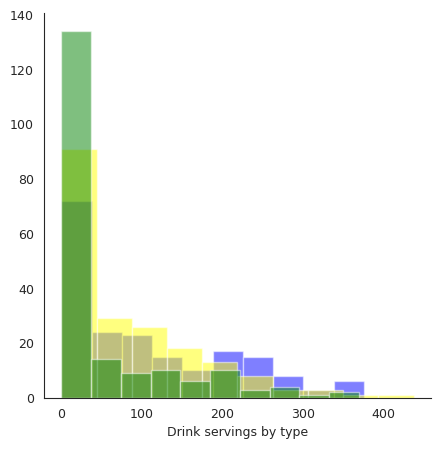

In [6]:
plt.figure(figsize=(5,5))
sns.set_style('white')
plt.hist(drinks['beer_servings'],bins=10,color=['blue'],alpha=0.5)
plt.hist(drinks['spirit_servings'],bins=10,color=['yellow'],alpha=0.5)
plt.hist(drinks['wine_servings'],bins=10,color=['green'],alpha=0.5)
sns.despine()
plt.yticks(fontsize=9)
plt.xticks(fontsize=9)
plt.xlabel('Drink servings by type', fontsize=9)
plt.show()

Namibia and Czech Republic drink bear the most.

In [13]:
drinks.nlargest(10, 'beer_servings')

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
country,,,,
Namibia,376,3,1,6.8
Czech Republic,361,170,134,11.8
Gabon,347,98,59,8.9
Germany,346,117,175,11.3
Lithuania,343,244,56,12.9
Poland,343,215,56,10.9
Venezuela,333,100,3,7.7
Ireland,313,118,165,11.4
Palau,306,63,23,6.9


Grenada and Belarus drink spirits the most.

In [7]:
drinks.nlargest(10, 'spirit_servings')

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
68,Grenada,199,438,28,11.9
15,Belarus,142,373,42,14.4
73,Haiti,1,326,1,5.9
141,Russian Federation,247,326,73,11.5
144,St. Lucia,171,315,71,10.1
72,Guyana,93,302,1,7.1
155,Slovakia,196,293,116,11.4
50,Dominica,52,286,26,6.6
169,Thailand,99,258,1,6.4
40,Cook Islands,0,254,74,5.9


In France and Portugal they drink wine the most.

In [8]:
drinks.nlargest(10, 'wine_servings')

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
61,France,127,151,370,11.8
136,Portugal,194,67,339,11.0
3,Andorra,245,138,312,12.4
166,Switzerland,185,100,280,10.2
48,Denmark,224,81,278,10.4
156,Slovenia,270,51,276,10.6
99,Luxembourg,236,133,271,11.4
42,Croatia,230,87,254,10.2
83,Italy,85,42,237,6.5
55,Equatorial Guinea,92,0,233,5.8


We see that beer is most in correlation with total consuption of alcohol maybe because is the drink that is most likely to be drunk without the food,outside of meal.

In [14]:
drinks_corr=drinks.corr()

In [15]:
drinks_corr

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
beer_servings,1.000000,0.458819,0.527172,0.835839
spirit_servings,0.458819,1.000000,0.194797,0.654968
wine_servings,0.527172,0.194797,1.000000,0.667598
total_litres_of_pure_alcohol,0.835839,0.654968,0.667598,1.000000


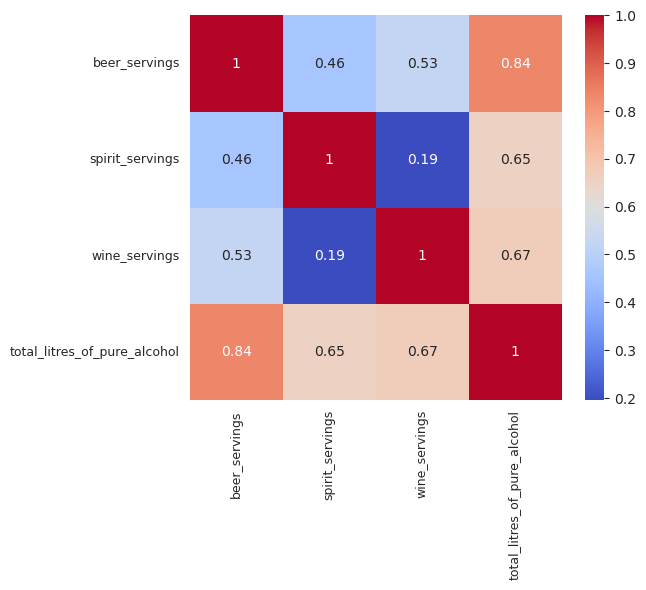

In [16]:
plt.figure(figsize=(6,5))
sns.heatmap(drinks_corr,annot=True,cmap='coolwarm')
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
plt.show()